# Ternary plots to visualize a portfolyo

The idea of this post is to demonstrate the usage of the ternary plots as a tool to visualize a hypotetical portfolio of three stocks (or three groups of stocks).
Supose we have a portfolio made up of three stocks. Supose we need to find the best potfolio among them in terms of lowest volatility, based on one year closing price.

Import the basic libraries.

In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as web
import math
import ternary
#The ternary plot drowing is adapted from https://github.com/marcharper/python-ternary
#Marc Harper et al.. (2015). python-ternary: Ternary Plots in Python. Zenodo. 10.5281/zenodo.34938

%matplotlib inline

Define the stocks, which will made up your portfolio.

In [2]:
symbols = ['AAPl', 'IBM', 'GOOG'] #The stocks to be included in the portfolio
noa = 3 # number of assets

Read the data. In our case we have chosen the closing prices. Also we can apply returns or ???

In [3]:
prices = pd.DataFrame()
for sym in symbols:
    prices[sym] = web.DataReader(sym, data_source='google',
                            start='1/1/2015', end='31/1/2016')['Close']
prices = prices.dropna()

Calculate the characteristic, which will be used as a basis for the calculation of the "best" portfolio. In our case we use volatility, which is the standard deviation of the prices over the defined above period.

In [4]:
def volatility(weights, prices):
    """
    Computes the portfolio volatility at a point in the simplex
    """
    p = np.asarray(weights)
    return np.sqrt(np.dot(p.T, np.dot(prices.cov(), p)))

In [24]:
def point_text(p, text, scale):
    #draws annotated point
    shift = np.array([-0.3,0.2, 0])*scale/10
    p1_text = np.array(p) + shift
    print(p1_text, shift,points)
    tax.annotate(text,p1_text)

Lets draw the prices, to see how do they looks like over the time period. ???

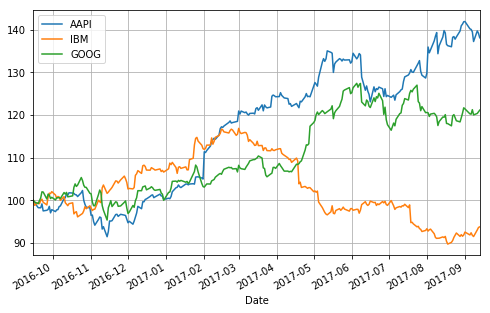

In [6]:
(prices / prices.iloc[0] * 100).plot(figsize=(8, 5), grid=True)

Ternary plot is a graphical representation of the so called barycentric coordinate system. Each point of it has three coordinates $\omega_i, i=1,3$, where the following conditions hold.

$$\sum_{i=1}^3\omega_i=1$$
$$0\leq\omega_i\leq1, i=1,3 $$
or
$$\sum_{i=1}^3\omega_i=100\%$$
$$0\%\leq\omega_i\leq100\%, i=1,3 $$

In our case each coordinate $\omega_i$ represents the proportion of particular stock in our portfolio. Lets asume that our  stocks are AAPL, IBM and GOOG. We can visualize the portfolios on a ternary plot. Supose we are interested of three portfolios, P1, P2 and P3 having different proportions of the stocks, as shown in the table.

$$\begin{array}{ |c | c | c | c |}
    \hline
    Portfolios & AAPL, \% & IBM, \% & GOOG, \% \\ \hline
    P1 & 10 & 20 & 70 \\ \hline
    P2 & 1 & 2 & 97 \\ \hline
    P3 & 35 & 30 & 30 \\
    \hline
  \end{array}
$$

The three portfolios are represented as red squared dots on the plot below.

[  7.  22.  70.] [-3.  2.  0.] [[10, 20, 70], [1, 2, 97], [35, 30, 30]]
[ -2.   4.  97.] [-3.  2.  0.] [[10, 20, 70], [1, 2, 97], [35, 30, 30]]
[ 32.  32.  30.] [-3.  2.  0.] [[10, 20, 70], [1, 2, 97], [35, 30, 30]]


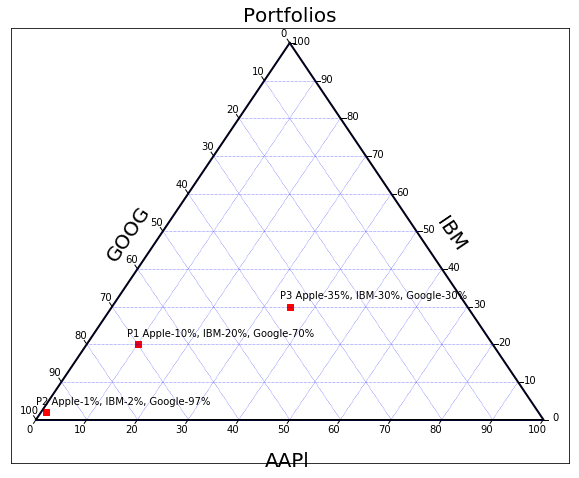

In [33]:
#The ternary plot drawing is adapted from https://github.com/marcharper/python-ternary
#Marc Harper et al.. (2015). python-ternary: Ternary Plots in Python. Zenodo. 10.5281/zenodo.34938
## Boundary and Gridlines
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(10, 8)

# Draw Boundary and Gridlines
tax.boundary(linewidth=2.0)
#tax.gridlines(color="black", multiple=6)
tax.gridlines(color="blue", multiple=scale/10, linewidth=0.5)

# Set Axis labels and Title
fontsize = 20
tax.set_title("Portfolios", fontsize=fontsize)
tax.bottom_axis_label(symbols[0], fontsize=fontsize)
tax.right_axis_label(symbols[1], fontsize=fontsize)
tax.left_axis_label(symbols[2], fontsize=fontsize)

points =[[10, 20, 70],[1, 2, 97],[35, 30, 30]]

point_text(points[0],"P1 Apple-10%, IBM-20%, Google-70%",scale)
point_text(points[1],"P2 Apple-1%, IBM-2%, Google-97%",scale)
point_text(points[2],"P3 Apple-35%, IBM-30%, Google-30%",scale)

tax.scatter(points, marker='s', color='red')

# Set ticks
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10)

# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()

ternary.plt.show()

Just the represnetation of particular portfolio on a tabular plot has only theoretical value. Much more practical is the oposite task, to find the structure of the portfolio, corresponding to a particular point of the plot. By varying the proportions of the stocks, we can calculate the volatility at each point from the plot.

In [8]:
prices = pd.DataFrame()
for sym in symbols:
    prices[sym] = web.DataReader(sym, data_source='google',
                            start='1/1/2015', end='31/1/2016')['Close']
prices = prices.dropna()

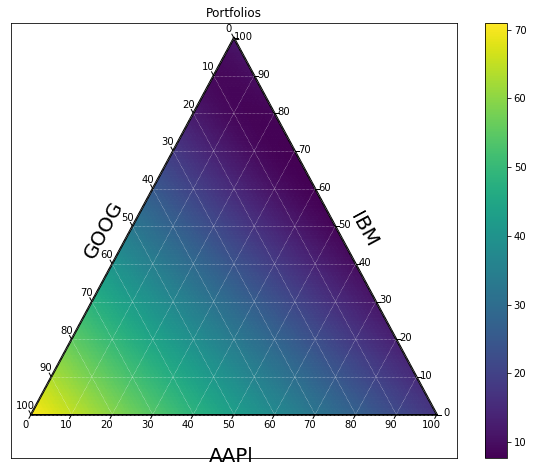

In [36]:
scale = 100
f = lambda p: volatility(p, prices)

figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(10, 8)
#tax.heatmapf(f, boundary=True, style="triangular",vmax=200,vmin=150.0,scientific=False)
tax.heatmapf(f, boundary=True, style="triangular",scientific=False)
tax.boundary(linewidth=2.0)
tax.gridlines(color="white", multiple=scale/10)

# Set Axis labels and Title
fontsize = 20
tax.bottom_axis_label(symbols[0], fontsize=fontsize)
tax.right_axis_label(symbols[1], fontsize=fontsize)
tax.left_axis_label(symbols[2], fontsize=fontsize)

tax.set_title("Portfolios")

tax.ticks(axis='lbr', linewidth=1, multiple=scale/10)

points =[[10, 80, 10]]
tax.scatter(points, marker='s', color='red')
point_text(points[0],"quite low vol.",scale)


tax.clear_matplotlib_ticks()
tax.show()